# GRIP @ The Sparks Foundation

# Induri Deepthi

## Data Science and Business Analytics Intern

## Task 2 - Color Identification in Images 

Implement an image color detector which identifies all the colors in an image or video

### Importing Libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Working with Opencv

### Example 1

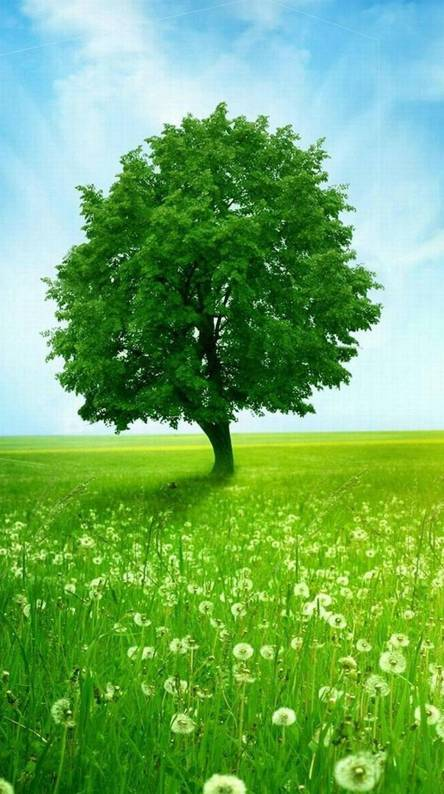

The type of this input is <class 'numpy.ndarray'>
Shape: (794, 444, 3)


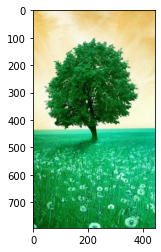

In [2]:
image = cv2.imread('images\image1.jpg') #To read any image
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

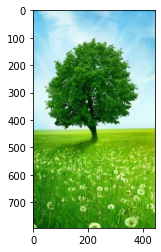

In [3]:
# converting the image rendering to a different color space using "cvtColor"
# using the "cv2.COLOR_BGR2RGB" to move from BGR to RGB color space

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

The image can also be converted to grayscale if needed.

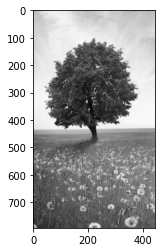

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

### Color Identification

First, we will define a function that can give us the hex values of our the colors that we will identify.

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.


In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 61.35955945, 136.59530515,  19.31770311]),
 array([202.678407  , 239.18677103, 243.94666974]),
 array([20.02931392, 81.87294323, 10.82268759]),
 array([166.71828498, 217.83299433,  98.35665346]),
 array([133.99701085, 207.58683298, 236.29289984]),
 array([116.14107838, 180.50282685,  27.02833447])]

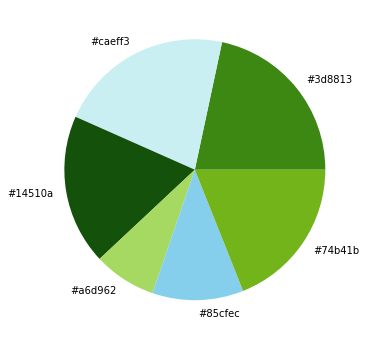

In [8]:
get_colors(get_image('images\image1.jpg'), 6, True)

### Example 2

[array([179.50812363, 159.00769607, 213.87368678]),
 array([5.13075701, 3.87778907, 6.42289284]),
 array([176.542124  ,  45.29585682, 116.90240285]),
 array([107.63692431, 103.18750419, 155.11952806]),
 array([218.90551976, 161.88471392,  51.00147504]),
 array([93.72881262, 23.90508719, 51.71576141]),
 array([203.25545487,  31.1192461 ,  25.876332  ]),
 array([228.80528416, 120.68707857, 160.97660658]),
 array([121.24925504, 133.37353199,  19.46117441]),
 array([ 24.08360064,  66.63418872, 112.18871959])]

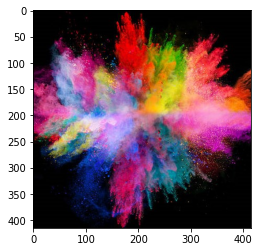

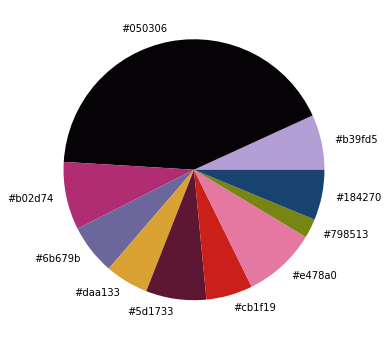

In [9]:
plt.imshow(get_image('images\image2.jpg'))
get_colors(get_image('images\image2.jpg'), 10 , True)

### Search Images using color

From the model above, we can extract the major colors. We will select a color and if it's hex matches or is close to the hex of the of the major colors of the image, we say it's a match.

In [10]:
IMAGE_DIRECTORY = r"C:\Users\DELL\Documents\GRIP TASKS\Computer Vision & IOT\TASK - 2\images" # images are in the folder images

COLORS = {
    'GREEN':[0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [255, 0, 0],
    'BLACK': [0, 0, 0]
} # dictionary of colors

images = [] # will save values in this list after reading the images

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

### Show all images

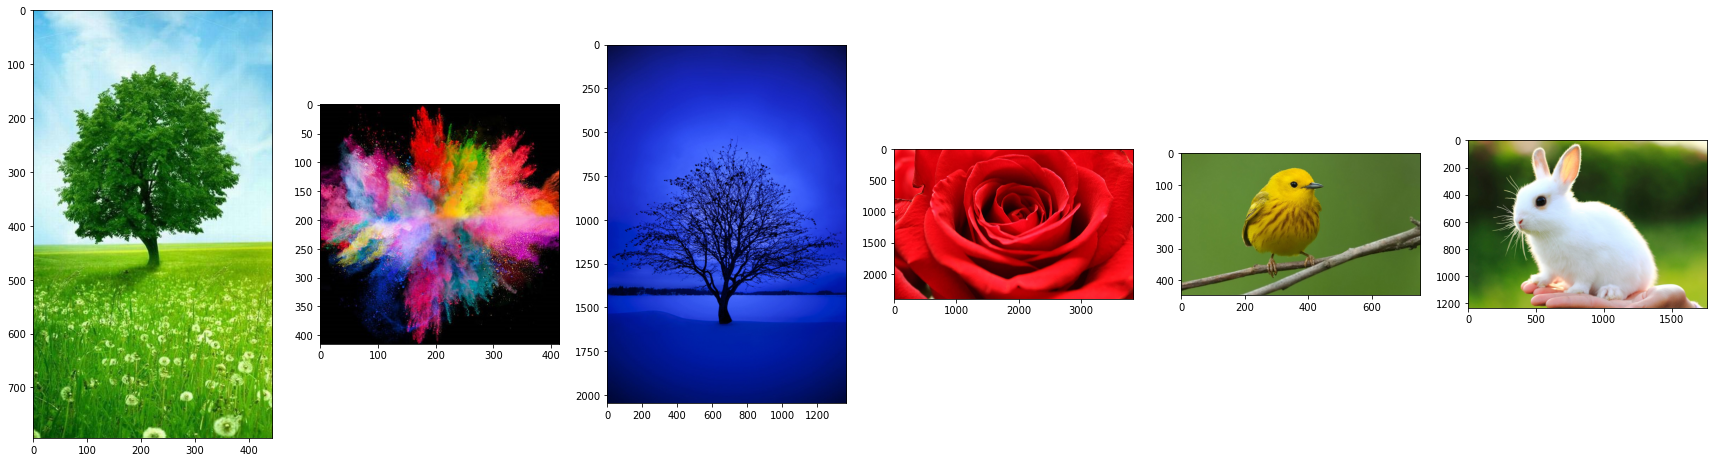

In [11]:
plt.figure(figsize = (30,10))

for i in range(len(images)):

    # splitting the area into subplots equal to number of images
    plt.subplot(1, len(images), i+1)
    
    plt.imshow(images[i])

#### Match Images with color

Defining method "match_image_by_color" to filter all images that match the selected color.

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10):
    
    # extracting the image colors in RGB format
    image_colors = get_colors(image, number_of_colors, False)
    
    # using rgb2lab to convert the selected color comparable format
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    
    # iterating over all the colors retrieved from image
    select_image = False
   
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
            
    return select_image

#### Show selected images

Defining function "show_selected_images" to iterate over all images, it filter them based on color and displays on the screen using "imshow"

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                       color,
                                       threshold,
                                       colors_to_match)
        
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Filter Results

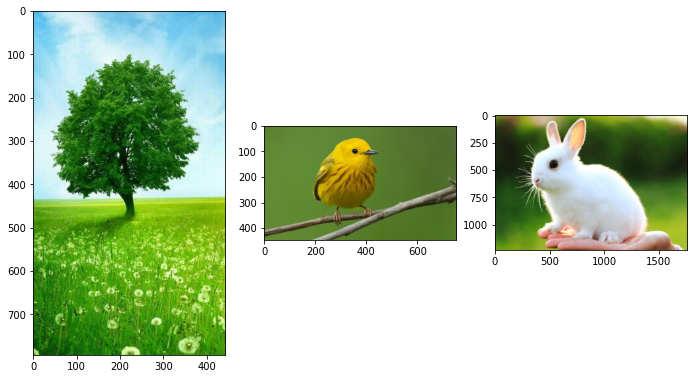

In [14]:
# search for GREEN

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['GREEN'], 60, 5)

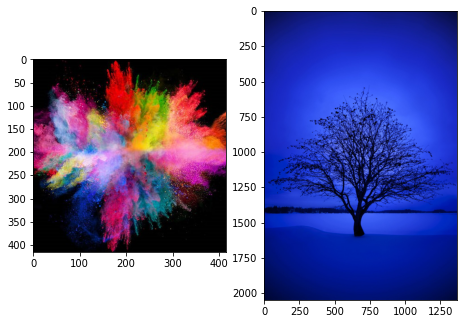

In [15]:
# search for BLUE

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['BLUE'], 70, 5)

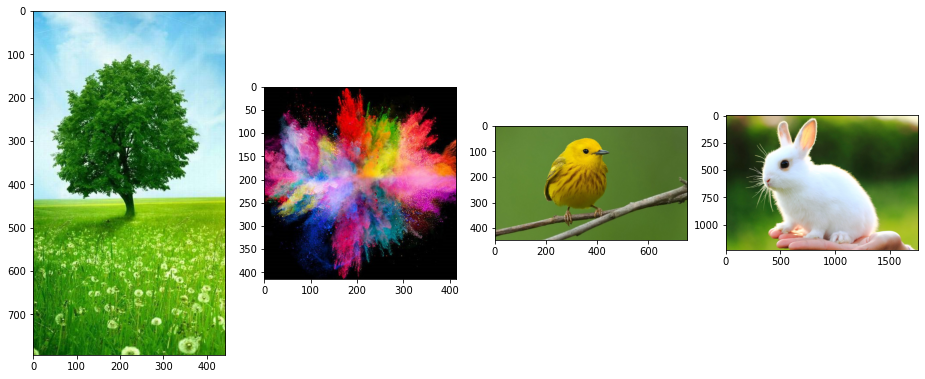

In [16]:
# search for YELLOW

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['YELLOW'], 70, 5)

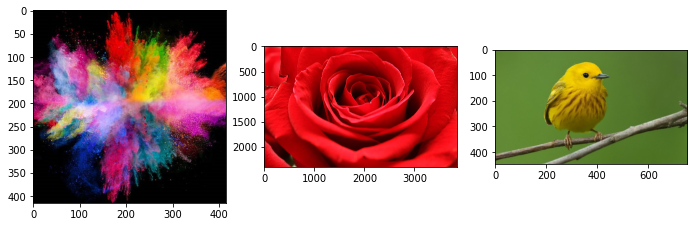

In [17]:
# search for RED

plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['RED'], 80, 5)